# Exploratory Data Analysis - pharmacy claim approval

### Project Goal  : build a model predicting  `pharmacy_claim_approved` based on the features `bin` and `drug`<br>
- `bin`  The BIN of the payer(insurance company) for the claim.
- `drug`   The drug that was associated with the claim.<br>
<br><br>Detailed background knowledge has been explained in the Readme file.

In this notebook, we will explore<br>
- the relative frequency distributions of the variables `bin`,`drug` and `pharmacy_claim_approved`.
- the relative frequency value distributions of the feature `pharmacy_claim_approval` for every possible combinations of `bin` and `drug` values.

# 0. Data Preprocessing

- Load and merge data into a single dataframe.
- Split data into three parts 'pre(process)', 'train' and 'test'.
- We will only use `X_pre` and `y_pre` for the exploaratory data analysis to avoid data leakage.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
claim = pd.read_csv('data/dim_claims.csv')
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   bin                      1335576 non-null  int64  
 2   drug                     1335576 non-null  object 
 3   reject_code              555951 non-null   float64
 4   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ MB


In [3]:
claim.columns

Index(['dim_claim_id', 'bin', 'drug', 'reject_code',
       'pharmacy_claim_approved'],
      dtype='object')

In [4]:
# features
X = claim.iloc[:, 1:3].copy()
# target variable
y = claim.iloc[:, 4].copy()

In [5]:
X.head()

,bin,drug
0,417380,A
1,999001,A
2,417740,A
3,999001,A
4,417740,A


In [6]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: pharmacy_claim_approved, dtype: int64

In [7]:
# data split preprocess : train : test = 3:1:1
X_train, X_test, y_train, y_test= train_test_split(X.copy(), y.copy(),
                                  shuffle = True,
                                  random_state = 623,
                                  test_size = .2,
                                  stratify = claim.pharmacy_claim_approved)
X_pre, X_train, y_pre, y_train= train_test_split(X_train.copy(), y_train.copy(),
                                                 shuffle = True,
                                                 random_state = 623,
                                                 test_size = .25,
                                                 stratify = y_train.copy())

In [8]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: pharmacy_claim_approved, dtype: int64

# 1. Relative Frequency Value Distribution

## -bin-

In [9]:
X_pre.bin.unique()

array([417380, 999001, 417614, 417740])

,approval_rate
417380,0.230119
999001,0.900342
417614,0.211364
417740,0.457546


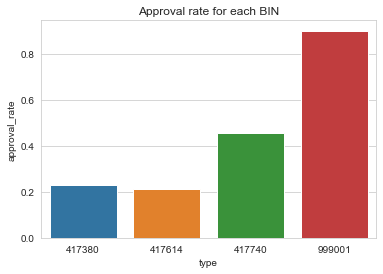

In [10]:
# dictionary => keys : BINs , values : the approval rates within fixed BINs
data = {X_pre.bin.unique()[0]: [X_pre.bin.unique()[0], X_pre[X_pre.bin == X_pre.bin.unique()[0]][y_pre ==1].shape[0]/X_pre[X_pre.bin == X_pre.bin.unique()[0]].shape[0]], 
        X_pre.bin.unique()[1]: [X_pre.bin.unique()[1], X_pre[X_pre.bin == X_pre.bin.unique()[1]][y_pre ==1].shape[0]/X_pre[X_pre.bin == X_pre.bin.unique()[1]].shape[0]], 
        X_pre.bin.unique()[2]: [X_pre.bin.unique()[2], X_pre[X_pre.bin == X_pre.bin.unique()[2]][y_pre ==1].shape[0]/X_pre[X_pre.bin == X_pre.bin.unique()[2]].shape[0]],
        X_pre.bin.unique()[3]: [X_pre.bin.unique()[3], X_pre[X_pre.bin == X_pre.bin.unique()[3]][y_pre ==1].shape[0]/X_pre[X_pre.bin == X_pre.bin.unique()[3]].shape[0]]}

# dataframe => rows : BINs , columns : the approval rates within fixed BINs
df = pd.DataFrame.from_dict(data, orient='index',
                  columns=['type','approval_rate'])
# bar chart
sns.barplot(data=df, x="type", y='approval_rate').set(title = 'Approval rate for each BIN')
df.drop('type', axis =1)

## -drug-

In [11]:
X_pre.drug.unique()

array(['A', 'C', 'B'], dtype=object)

,approval_rate
A,0.575618
B,0.549615
C,0.638584


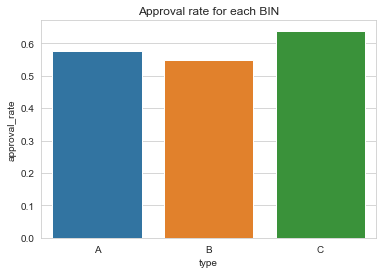

In [12]:
# dictionary => keys : drug types , values : the approval rates within fixed drug types
data = {'A':  ['A', X_pre[X_pre.drug == 'A'][y_pre == 1].shape[0]/X_pre[X_pre.drug == 'A'].shape[0]], 
        'B':  ['B', X_pre[X_pre.drug == 'B'][y_pre == 1].shape[0]/X_pre[X_pre.drug == 'B'].shape[0]], 
        'C':  ['C', X_pre[X_pre.drug == 'C'][y_pre == 1].shape[0]/X_pre[X_pre.drug == 'C'].shape[0]]}

# dataframe => rows : drug types , columns : the approval rates within fixed drug types
df=pd.DataFrame.from_dict(data, orient='index',
                  columns=['type','approval_rate'])
# bar chart
sns.barplot(data=df, x="type", y='approval_rate').set(title = 'Approval rate for each BIN')
df.drop('type', axis =1)

# 2. Pharmacy Claim Approval Rates for Fixed 'bin' and 'drug' Values

(BIN, drug type) = ( 417380 , A )
approval_rate : 0.0
disapproval_rate : 1.0


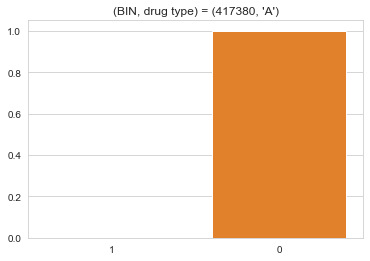

(BIN, drug type) = ( 417380 , C )
approval_rate : 0.0
disapproval_rate : 1.0


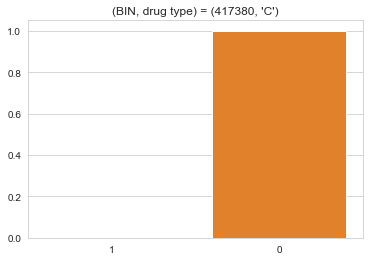

(BIN, drug type) = ( 417380 , B )
approval_rate : 0.901
disapproval_rate : 0.099


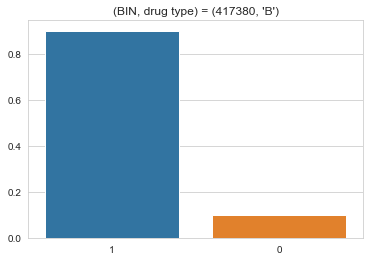

(BIN, drug type) = ( 999001 , A )
approval_rate : 0.901
disapproval_rate : 0.099


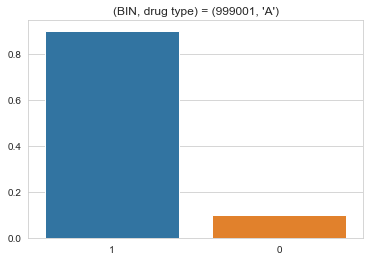

(BIN, drug type) = ( 999001 , C )
approval_rate : 0.899
disapproval_rate : 0.101


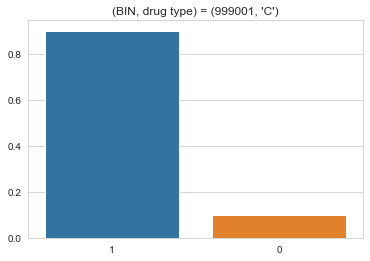

(BIN, drug type) = ( 999001 , B )
approval_rate : 0.9
disapproval_rate : 0.1


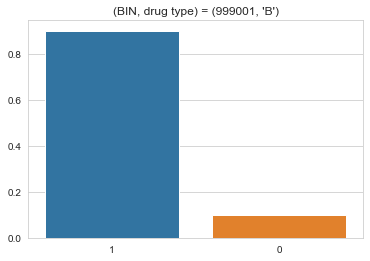

(BIN, drug type) = ( 417614 , A )
approval_rate : 0.0
disapproval_rate : 1.0


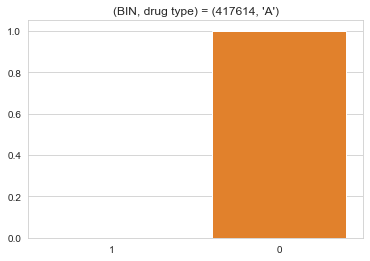

(BIN, drug type) = ( 417614 , C )
approval_rate : 0.901
disapproval_rate : 0.099


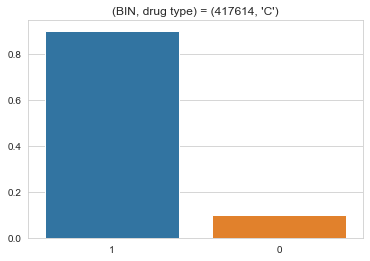

(BIN, drug type) = ( 417614 , B )
approval_rate : 0.0
disapproval_rate : 1.0


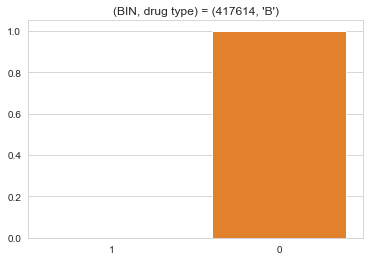

(BIN, drug type) = ( 417740 , A )
approval_rate : 0.9
disapproval_rate : 0.1


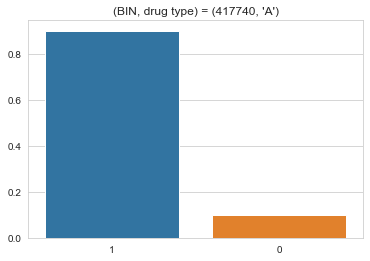

(BIN, drug type) = ( 417740 , C )
approval_rate : 0.0
disapproval_rate : 1.0


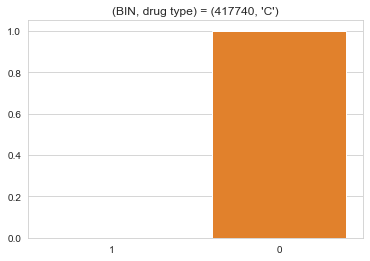

(BIN, drug type) = ( 417740 , B )
approval_rate : 0.0
disapproval_rate : 1.0


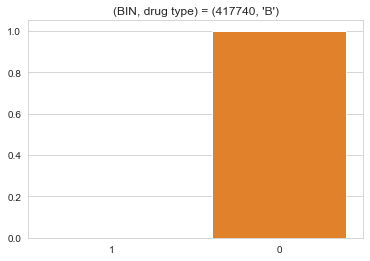

In [13]:
# the relative frequency distribution of the feature 'pharmacy_claim_approved' for fixed 'bin' and 'drug' values
for i in X_pre.bin.unique() :
    for j in X_pre.drug.unique() :
        print('(BIN, drug type) =','(',i,',',j,')')
        print('approval_rate :',round(y_pre.loc[(X_pre.bin == i) & (X_pre.drug == j) & (y_pre ==1)].shape[0]/y_pre[(X_pre.bin == i) & (X_pre.drug == j)].shape[0],3))
        print('disapproval_rate :',round(y_pre.loc[(X_pre.bin == i) & (X_pre.drug == j) & (y_pre ==0)].shape[0]/y_pre[(X_pre.bin == i) & (X_pre.drug == j)].shape[0],3))
        pa_approved_val = pd.DataFrame({1 : round(y_pre.loc[(X_pre.bin == i) & (X_pre.drug == j) & (y_pre ==1)].shape[0]/y_pre[(X_pre.bin == i) & (X_pre.drug == j)].shape[0],3),
                                        0 : round(y_pre.loc[(X_pre.bin == i) & (X_pre.drug == j) & (y_pre ==0)].shape[0]/y_pre[(X_pre.bin == i) & (X_pre.drug == j)].shape[0],3)}
                                        ,index = ['ratio'])
        sns.barplot(data=pa_approved_val).set(title='(BIN, drug type) = '+str((i,j)))
        plt.show()

- We notice that when we fix the insurance company and drug type, pharmacy claims are almost always either approved or rejected in the same way.
- This leads us to conjecture that each insurance company has a fixed policy for handling pharmacy claims for certain drugs.
- We will further explore this idea in the sequel notebooks.